### <center>Feature Selection</center>

#### <span style = "color:red">Get the Data</span>

In [10]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data_5.csv')

In [11]:
data = data.drop(['Cryo', 'PDB', 'Cryo Type', 'neighbor trees', 'Peak Level', 'Size Cutoff >'], axis = 1)
columns = {'Map Resolution': 'Resolution', 'vTree#':'Tree_N', 'numOfVoxels': 'Voxel_N', 'numberOfNeighbors':'N_Neighbors', 'Max Density':'Max_density', 'MinDensity':'Min_density', 'AvgDensity':'Avg_density', 'stdDensity':'Std_density', 'Percentage of voxels within 1 std':'1_std', 'Percentage of voxels within 2 std':'2_std', 'PCA_EigenValue1':'PCA_1', 'PCA_EigenValue2':'PCA_2', 'PCA_EigenValue3':'PCA_3', 'PCA Thickness Ratio ev1/ev2':'Thick_R_12', 'PCA Thickness Ratio ev2/ev3':'Thick_R_23', 'Structure Tensor Helix (Percentage)':'Tensor_helix', 'Structure Tensor Sheet (Percentage)':'Tensor_sheet', 'Percentage of voxels with density less than average':'Per_voxel', 'Radius of Gyration':'R_Gyr', 'Width':'Width', 'Hlx overlap (percentage)':'Hlx_Per', 'Strand overlap (percentage)':'Sheet_Per', 'Loop overlap (percentage)':'Loop_Per', 'Unknown (percentage) - most likely outside protein model (noise)':'Unknown'}
data = data.rename(columns=columns)

In [12]:
temp = data[['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown']]
max_Per = np.max(temp, axis=1)
#temp.shape, max_Per.shape
data['Max_Per'] = max_Per
data.head()
threshold = 0.9 # select data whose maximum overlap percentage is greater than a threshold
data = data[data['Max_Per'] > threshold]
data = data.drop(['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown', 'Max_Per'], axis = 1)

In [13]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
1,5.6,73,125,6,0.65,0.51,0.57,0.04,0.62,0.98,...,5.79,2.31,1.60,2.51,0.50,0.50,0.53,4.2,5.16151,Loop
3,5.6,103,92,4,0.65,0.46,0.54,0.04,0.62,0.98,...,3.60,2.27,2.05,1.58,0.45,0.55,0.52,3.7,3.64974,Loop
5,5.6,116,78,4,0.60,0.46,0.52,0.03,0.60,0.99,...,2.56,1.57,5.50,1.63,0.54,0.46,0.50,4.3,2.10718,Loop
6,5.6,102,94,5,0.62,0.49,0.54,0.03,0.64,0.96,...,3.11,2.04,3.35,1.53,0.46,0.54,0.50,4.0,4.47000,Loop
7,5.6,66,132,3,0.66,0.49,0.55,0.04,0.62,0.97,...,4.63,3.38,1.49,1.37,0.67,0.33,0.55,3.9,5.16151,Helix


In [14]:
data = data.loc[(data['Thick_R_12'] > 0) & (data['Thick_R_23'] > 0) & (data['Resolution'] >= 5.3), :] # remove the negative Thick_R_12 and Thick_R_23

In [15]:
data_Helix = data[data['Label'] == 'Helix']
data_Sheet = data[data['Label'] == 'Sheet']
data_Loop = data[data['Label'] == 'Loop']
data_Unknown = data[data['Label'] == 'Unknown']

print(data_Helix.shape, data_Sheet.shape, data_Loop.shape, data_Unknown.shape)

(2026, 21) (784, 21) (590, 21) (239, 21)


In [16]:
data_Helix = data_Helix.sample(n = 300, random_state = 42)
data_Sheet = data_Sheet.sample(n = 300, random_state = 42)
data_Loop = data_Loop.sample(n = 590, random_state = 42)

In [17]:
data = pd.concat([data_Helix, data_Sheet, data_Loop])

In [18]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
7040,7.7,6,72,3,0.61,0.43,0.49,0.05,0.67,0.94,...,3.70,2.65,2.10,1.40,0.75,0.25,0.60,3.8,3.75659,Helix
4833,6.6,428,59,2,0.52,0.44,0.47,0.03,0.59,1.00,...,1.93,1.52,1.58,1.27,0.20,0.80,0.54,2.6,3.67696,Helix
8285,6.8,16,142,5,0.83,0.71,0.76,0.03,0.68,0.96,...,5.34,3.24,4.63,1.65,0.68,0.32,0.54,5.8,3.11769,Helix
3591,8.2,31,148,3,0.69,0.48,0.58,0.05,0.57,0.98,...,5.62,2.19,1.25,2.57,0.48,0.52,0.54,3.9,4.23745,Helix
7062,5.9,37,140,2,0.65,0.47,0.53,0.04,0.68,0.95,...,4.02,3.29,3.34,1.22,0.53,0.47,0.61,4.6,3.89469,Helix


In [19]:
data.describe()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,6.502689,77.606723,128.589076,2.862185,0.600513,0.467034,0.529101,0.032370,0.643571,0.971697,10.157555,3.554176,1.856050,2.866597,2.026479,0.499655,0.500454,0.522387,3.773193,4.112584
std,1.169281,89.515573,113.234620,1.626473,0.094998,0.068018,0.075169,0.014002,0.040513,0.019140,11.835992,2.128603,0.948497,2.653582,0.962117,0.182530,0.182514,0.046105,1.369269,1.706522
min,5.500000,1.000000,10.000000,0.000000,0.230000,0.190000,0.210000,0.000000,0.460000,0.880000,0.290000,0.380000,0.120000,0.100000,1.040000,0.000000,0.000000,0.330000,1.300000,0.000000
25%,5.800000,21.000000,47.000000,2.000000,0.530000,0.430000,0.480000,0.020000,0.620000,0.960000,4.180000,2.082500,1.132500,1.640000,1.430000,0.380000,0.380000,0.500000,2.800000,3.031240
50%,5.900000,44.000000,97.000000,3.000000,0.590000,0.460000,0.520000,0.030000,0.640000,0.970000,7.220000,3.170000,1.840000,2.210000,1.780000,0.480000,0.520000,0.530000,3.700000,3.894690
75%,6.720000,94.000000,178.750000,4.000000,0.660000,0.500000,0.570000,0.040000,0.670000,0.990000,11.850000,4.455000,2.427500,3.100000,2.260000,0.620000,0.620000,0.550000,4.400000,4.849740
max,9.800000,488.000000,889.000000,10.000000,0.950000,0.770000,0.870000,0.090000,0.820000,1.000000,211.190000,14.450000,7.970000,49.870000,10.640000,1.000000,1.000000,0.710000,14.900000,17.490000


#### <span style = "color:red">Discover and visualize the data to gain insights</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1174c4fd0>,
      dtype=object)

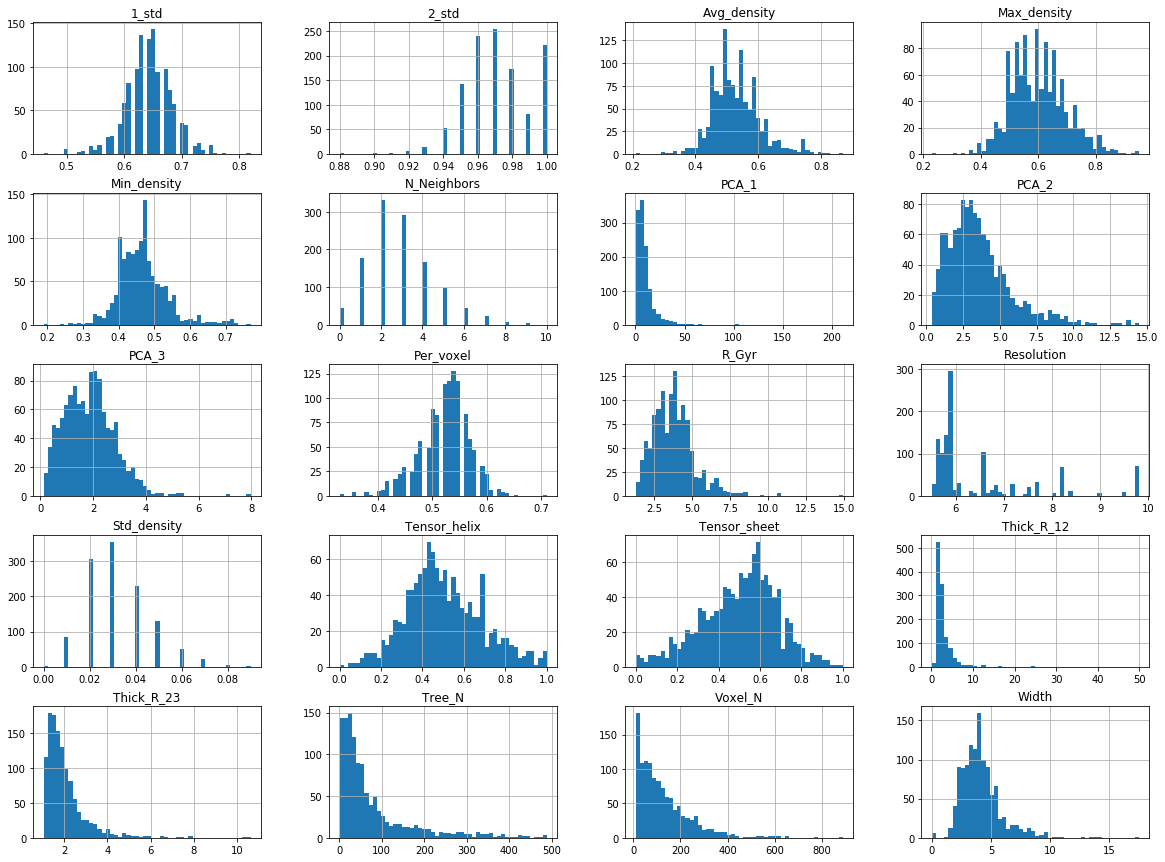

In [20]:
data.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Prepare Training Set and Test Set</span>

In [21]:
data_X = data.iloc[:, 0:-1]
data_Y = data.iloc[:, -1]

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
data_Y[data_Y == 'Helix'] =0
data_Y[data_Y == 'Sheet'] =0
data_Y[data_Y == 'Loop'] = 1

In [24]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=42, stratify = data_Y)
train_Y = train_Y.astype(np.int64)
test_Y = test_Y.astype(np.int64)

In [25]:
train_X.columns

Index(['Resolution', 'Tree_N', 'Voxel_N', 'N_Neighbors', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width'],
      dtype='object')

#### <span style = "color:red">Prepare the Data for Machine Learning Algorithms</span>

In [26]:
# Select specific columns
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Create Pipeline for Numeric Columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

left_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width'])),
    ("transform", QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=42))
])

right_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Resolution', 'N_Neighbors'])),
])

from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("left_pipeline", left_pipeline),
        ("right_pipeline", right_pipeline),
    ])

train_X = pd.DataFrame(preprocess_pipeline.fit_transform(train_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'Resolution', 'N_Neighbors'])
test_X = pd.DataFrame(preprocess_pipeline.transform(test_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '1_std', '2_std', 'PCA_1',
       'PCA_2', 'PCA_3', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'Per_voxel', 'R_Gyr', 'Width', 'Resolution', 'N_Neighbors'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c3d0610>,
      dtype=object)

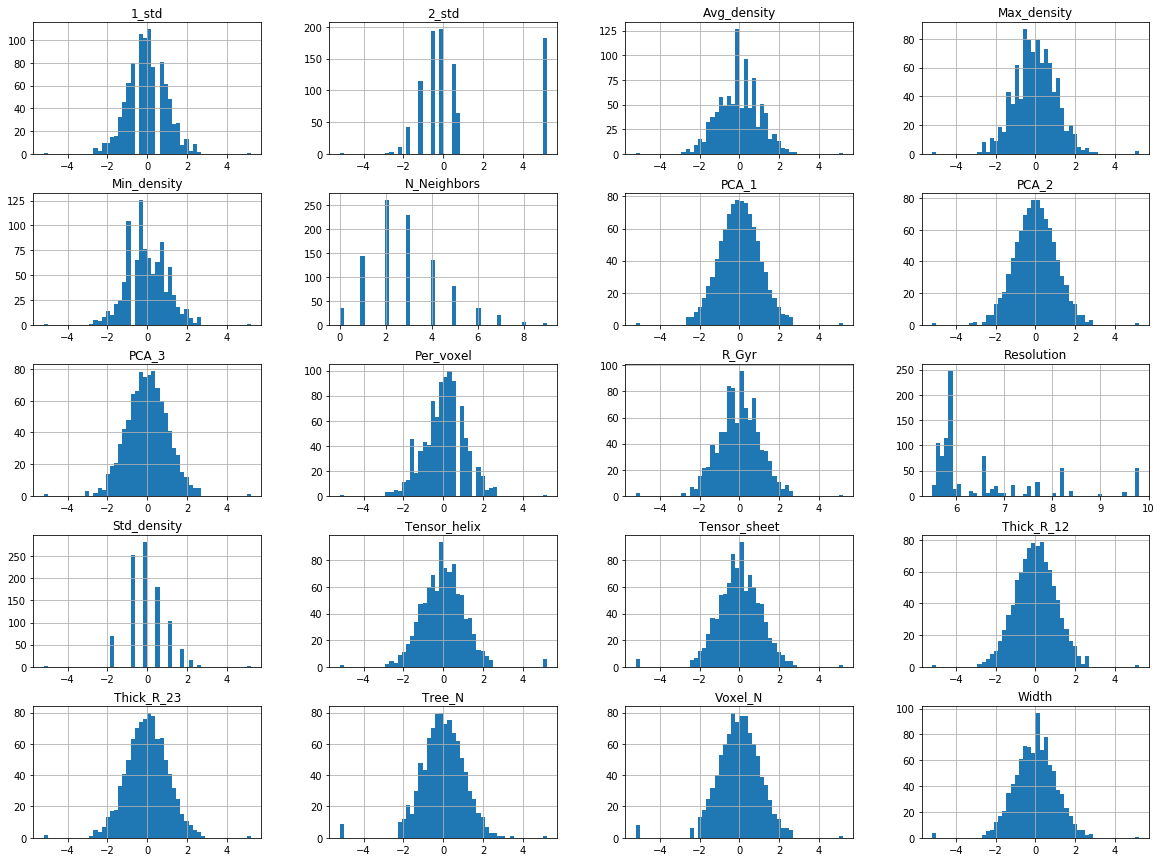

In [27]:
train_X.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Feature Selection</span>

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

#### <span style = "color:red">Best K Features</span>

In [29]:
# select best k features, k = 1, 2, ...
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

X_new = []
for i in range(1, 21):
    X_new.append(SelectKBest(f_classif, k=i).fit_transform(train_X, train_Y))
    
# use the cross-validation to decide the best k value
for i in range(1, 21):
    mean, std = cross_validation(RandomForestClassifier(random_state=42), X_new[i-1], train_Y, 10)
    print(i, mean, std)

1 0.6628399122807017 0.05771579140849224
2 0.5630811403508771 0.04433020738785079
3 0.628201754385965 0.036215457003142236
4 0.6805921052631578 0.05245339446694518
5 0.7079605263157894 0.05075177372432389
6 0.6922478070175437 0.03802280135371319
7 0.692236842105263 0.05084764057774749
8 0.6995285087719297 0.052244143480844725
9 0.7038048245614034 0.0509350578851957
10 0.7090350877192982 0.04798945653574846
11 0.7142763157894737 0.049517155375847784
12 0.7079934210526315 0.04782261862172572
13 0.7216228070175438 0.052503631944312165
14 0.6974671052631579 0.04363512845636185
15 0.700625 0.037086894651428004
16 0.7279166666666667 0.04799637074133621
17 0.7384429824561404 0.05289735980956918
18 0.7384539473684211 0.053625978237208
19 0.7384320175438597 0.05174637654534356
20 0.7383991228070176 0.0642693122295535


In [31]:
# Use the inverse transform to check which features are selected, the removed feature have all 0s
sel = SelectKBest(f_classif, k=17)
X_new = sel.fit_transform(train_X, train_Y)
X_inverse = pd.DataFrame(sel.inverse_transform(X_new), columns = train_X.columns)
X_inverse.head()

,Tree_N,Voxel_N,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Resolution,N_Neighbors
0,-0.820273,-0.424820,-1.916697,-1.595714,-1.878583,-0.820273,0.0,0.0,-0.916586,-0.533340,-0.571237,-1.024914,0.228709,-0.710512,0.0,-0.960739,-0.785499,0.314295,9.8,1.0
1,-0.435339,0.593624,1.223594,0.931183,0.921511,1.184587,0.0,0.0,0.163943,0.170628,0.912661,0.145366,-1.155143,0.470230,0.0,-0.183671,0.196497,0.802765,8.2,3.0
2,-1.353552,1.531465,1.147303,0.491440,0.785499,1.184587,0.0,0.0,0.848230,0.293232,0.072837,0.892523,0.265691,-0.267681,0.0,0.608715,0.718642,0.107272,5.7,1.0
3,-0.520070,0.761351,0.950795,0.491440,0.785499,1.184587,0.0,0.0,0.471968,0.881313,0.491440,-0.145366,0.687885,-0.018895,0.0,-0.601152,0.556470,-0.093374,8.2,3.0
4,1.964974,0.069334,-0.726819,-0.280760,-0.498558,-0.820273,0.0,0.0,0.019343,-0.407340,-0.178005,0.498558,-0.373814,0.088287,0.0,-0.601152,-0.126296,-0.718642,6.6,3.0
